### Unsupervised Learning - Clustering 

#### Objective:
To categorise a group of countries using various socio-economic and health factors that determine the overall development of the country into probable 'under-developed' and 'developed' countries. Here four different Clustering algorithms will be used to structure the unlabelled data together and draw conclusions from it.

#### Context : 
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively.    
So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, the Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then one needs to suggest atleast 5 countries which the CEO needs to focus on the most.    
Link to the data set: https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data   

#### Data Set: 
The data set contains a list of 167 countries with various socio-economic and health factors like income, GDP, child mortality, life expectancy etc. which determine the overall development of the country. 

|Attribute|Description|
|---|---|
|Country |Name of the Country|
|Child_mortality |Death of children under 5 years of age per 1000 live births|
|Exports(\%) |Exports of goods and services per capita. Given as \% age of the GDP per capita|
|Health_spending |Total health spending per capita. Given as \% age of GDP per capita|
|Imports(\%) |Imports of goods and services per capita. Given as \% age of the GDP per capita|
|Income |Net income per person|
|Inflation |The measurement of the annual growth rate of the Total GDP|
|life_expectancy |The average number of years a new born child would live if the current mortality patterns are to remain the same|
|total_fertility |The number of children that would be born to each woman if the current age-fertility rates remain the same|
|GDP_per_capita |The GDP per capita. Calculated as the Total GDP divided by the total population|


### Importing the libraries

In [1]:
import numpy as np, os
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import math
from time import time

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

### Reading the train csv data file

In [3]:
data = pd.read_csv("Country-data.csv")

### Preprocessing and Data Cleaning

In [4]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### Renaming some of the columns for better understanability

In [5]:
data.rename(columns={'child_mort':'child_mortality','life_expec':'life_expectancy',
                     'total_fer':'total_fertility'}, inplace=True)

In [6]:
data.rename(columns={'health':'health_spending','exports':'exports(%)',
                     'imports':'imports(%)','gdpp':'GDP_per_capita'}, inplace=True)

In [7]:
data.head(10)

,country,child_mortality,exports(%),health_spending,imports(%),income,inflation,life_expectancy,total_fertility,GDP_per_capita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [8]:
data.shape

(167, 10)

In [9]:
# preprocessing
data.info(verbose = True, show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          167 non-null    object 
 1   child_mortality  167 non-null    float64
 2   exports(%)       167 non-null    float64
 3   health_spending  167 non-null    float64
 4   imports(%)       167 non-null    float64
 5   income           167 non-null    int64  
 6   inflation        167 non-null    float64
 7   life_expectancy  167 non-null    float64
 8   total_fertility  167 non-null    float64
 9   GDP_per_capita   167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


> __So there are no missing values__

In [10]:
dataxy = data.copy()

In [11]:
## Convert the int Dtypes to float Dtypes
for col in dataxy.columns:
    if dataxy[col].dtype=='int64':
        dataxy[col] = dataxy[col].astype(np.float)

#### Since the feature 'country' is a non-numeric column, it won't be used for the clustering analysis

In [12]:
float_cols = [col for col in dataxy.columns if col!='country']

In [13]:
float_cols

['child_mortality',
 'exports(%)',
 'health_spending',
 'imports(%)',
 'income',
 'inflation',
 'life_expectancy',
 'total_fertility',
 'GDP_per_capita']

In [14]:
dataxy.drop(columns='country',inplace=True)

In [15]:
dataxy.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mortality,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports(%),167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health_spending,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports(%),167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expectancy,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fertility,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
GDP_per_capita,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


> *It can be seen from the summary above that for the features __'income'__ and __GDP_per_capita__, the mean values are much higher than the 50th percentile, which means that these two features are right skewed and might have some outliers*

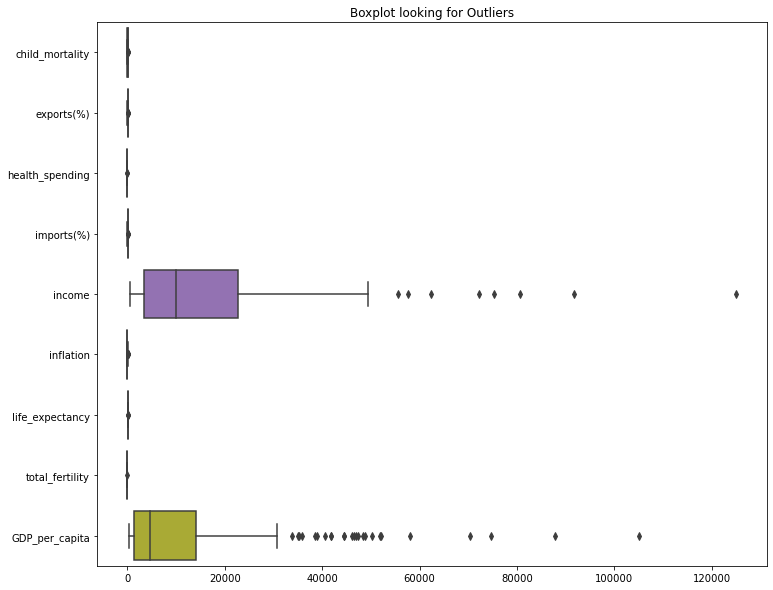

In [16]:
## Looking for Outliers
fig, ax = plt.subplots(figsize=(12,10))
ax = sns.boxplot(data = dataxy, orient='h')
ax.set_title('Boxplot looking for Outliers');

> *As expected there are outliers for these two features. These could be reasonably assigned to the fact that there is a wide gap between the rich and poor countries and the number of richer countries is less than half of the total data.*

> *Hence these __outliers would be treated as essential__ to the data. The dataframe can be sorted according to the __income__ and __GDP_per_capita__ in decreasing order as below, which will further help to give insights.*

### Exploratory Data Analysis ###

In [17]:
data.sort_values(by='income', ascending=False).head(10)

,country,child_mortality,exports(%),health_spending,imports(%),income,inflation,life_expectancy,total_fertility,GDP_per_capita
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
157,United Arab Emirates,8.6,77.7,3.66,63.6,57600,12.500,76.5,1.87,35000
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
159,United States,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48400
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700


In [18]:
data.sort_values(by='GDP_per_capita', ascending=False).head(10)

,country,child_mortality,exports(%),health_spending,imports(%),income,inflation,life_expectancy,total_fertility,GDP_per_capita
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
110,Netherlands,4.5,72.0,11.90,63.6,45500,0.848,80.7,1.79,50300
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700
159,United States,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48400


In [19]:
data.sort_values(by='child_mortality', ascending=False).head(10)

,country,child_mortality,exports(%),health_spending,imports(%),income,inflation,life_expectancy,total_fertility,GDP_per_capita
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.00,60.5,5.84,2330
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.81,57.9,5.87,575
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334


> One can already begin to see some correlation between the important features like __income__, __GDP_per_capita__, __child_mortality__ etc. *Countries with higher income have lower child_mortality and vice-versa.*

#### Data Visualization

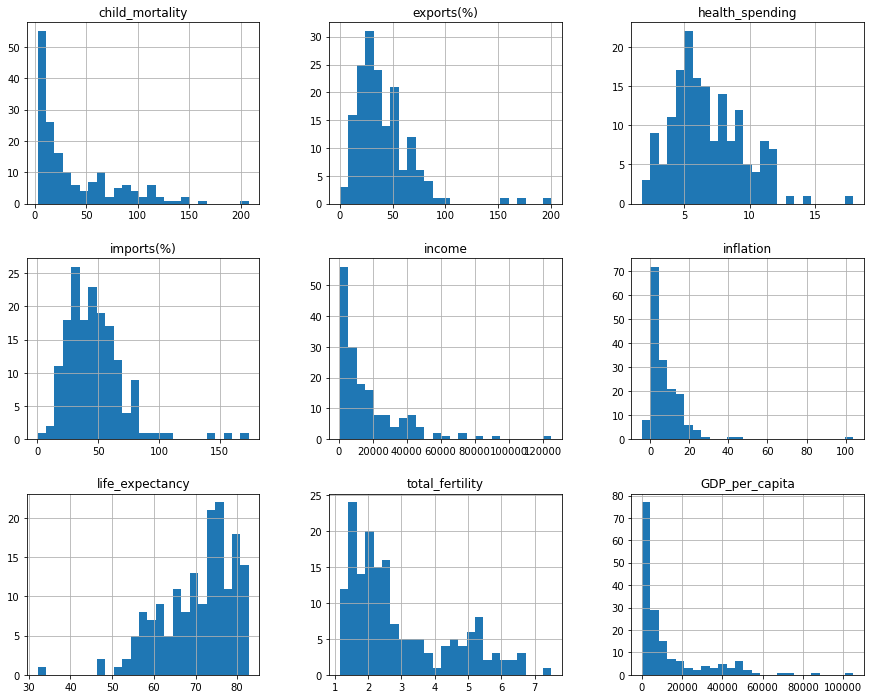

In [20]:
## Histogram plot to see for the type of distribution
dataxy.hist(bins=25, figsize=(15,12));

> Some of the features are __highly skewed__ like child_mortality, income, life_expectancy, GDP etc. which might need some transformation later on

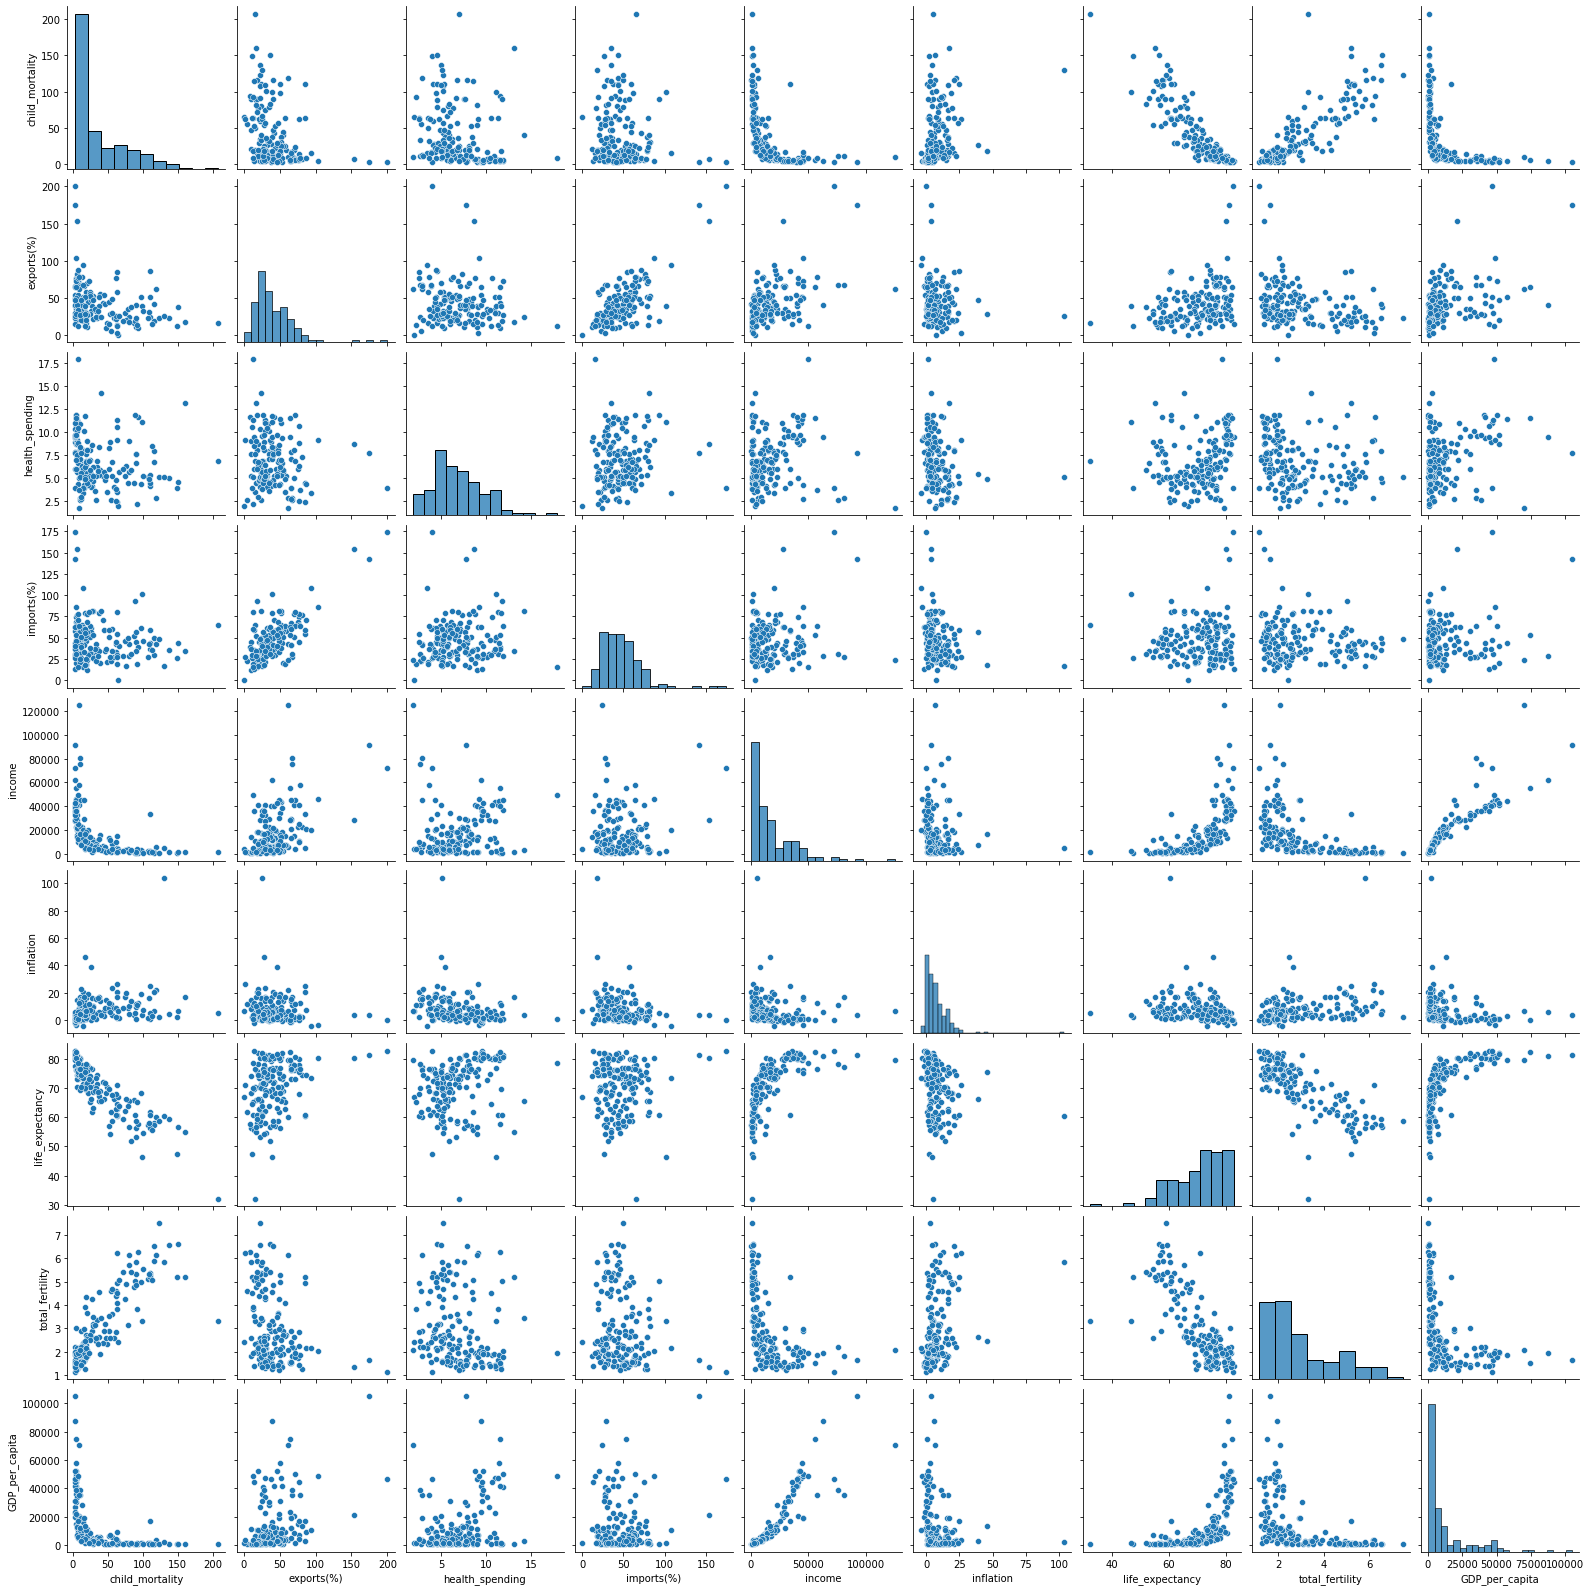

In [21]:
## Pairplots
#sns.set_context('notebook')
#sns.set_style('white')
sns_plot = sns.pairplot(data=dataxy,palette='rainbow')
sns_plot.savefig('pairplot.png')

> From the pairplots, a fair idea of the correlation between the various important features like __child_mortality, life_expectancy, total_fertility, income, GDP_per_capita__ etc. can be drawn.

#### Correlation

In [22]:
## Correlation Matrix
corr_mat = dataxy[float_cols].corr()

#remove the diagonal values in the corr matrix
for x in range(len(float_cols)):
    corr_mat.iloc[x,x] = 0.0

corr_mat

,child_mortality,exports(%),health_spending,imports(%),income,inflation,life_expectancy,total_fertility,GDP_per_capita
child_mortality,0.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports(%),-0.318093,0.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health_spending,-0.200402,-0.114408,0.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports(%),-0.127211,0.737381,0.095717,0.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,0.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,0.000000,-0.239705,0.316921,-0.221631
life_expectancy,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,0.000000,-0.760875,0.600089
total_fertility,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,0.000000,-0.454910
GDP_per_capita,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,0.000000


> One could draw some general conclusions from the above correlation values. 

> - The factors like child_mortality, total_fertility, inflation have a negative correlation with factors like GDP_per_capita, income, life_expectancy. This could indicate that __under-developed countries__ having lower GDP have higher child mortality rate, higher inflation and also more births are recorded per woman
> - Income, GDP, exports, life_expectancy have a positive correlation with each other. Which could indicate that __developed countries__ tend to fare ecomically better with more exports, have a healthier longer living population and lesser number of births and child deaths

#### Pairwise maximal positive correlations

In [23]:
corr_mat.idxmax().sort_index(ascending=False)

total_fertility    child_mortality
life_expectancy             income
inflation          total_fertility
income              GDP_per_capita
imports(%)              exports(%)
health_spending     GDP_per_capita
exports(%)              imports(%)
child_mortality    total_fertility
GDP_per_capita              income
dtype: object

#### Pairwise maximal negative correlations

In [24]:
corr_mat.idxmin().sort_index(ascending=False)

total_fertility    life_expectancy
life_expectancy    child_mortality
inflation          health_spending
income             child_mortality
imports(%)               inflation
health_spending          inflation
exports(%)         total_fertility
child_mortality    life_expectancy
GDP_per_capita     child_mortality
dtype: object

### Feature Engineering

#### Transformation against Skewness
> As pointed out previously in the histogram plot, here the skewed columns would be appropriately transformed so as to help the clustering algorithms function better.

In [25]:
## Finding the skew in the data > 0.75
skew_cols = (dataxy[float_cols].
            skew().
            sort_index(ascending=False))
skew_cols = skew_cols.loc[skew_cols > 0.75]
skew_cols.sort_values(ascending=False)

inflation          5.154049
exports(%)         2.445824
income             2.231480
GDP_per_capita     2.218051
imports(%)         1.905276
child_mortality    1.450774
total_fertility    0.967092
dtype: float64

#### Log Transformation

In [26]:
for col in skew_cols.index:
    dataxy[col] = np.log1p(abs(dataxy[col]))

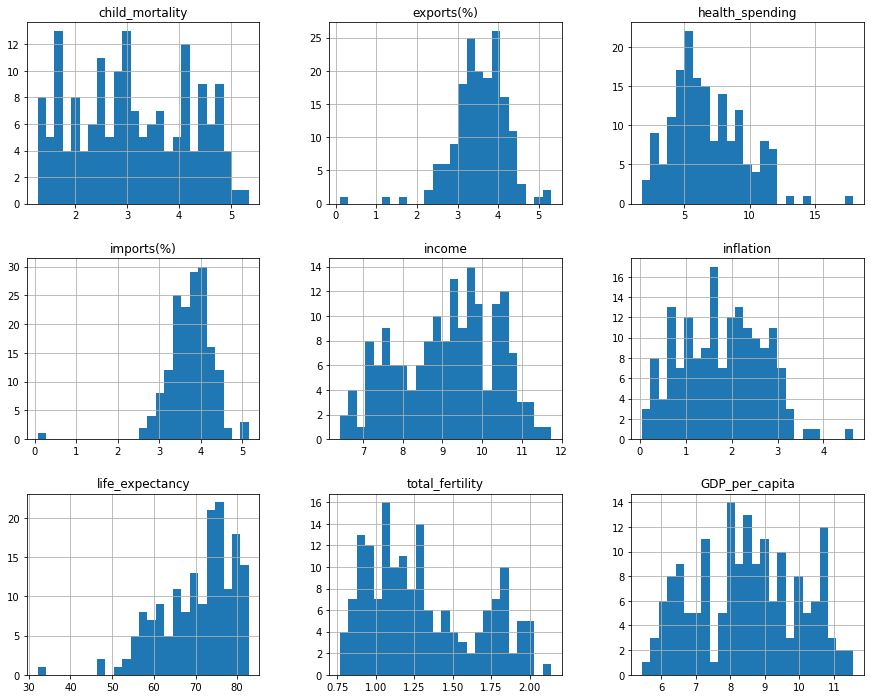

In [27]:
## Histogram plot to check for skew after Log Transformation
dataxy.hist(bins=25, figsize=(15,12));

> The Skewness has been reduced considerably and the data is suited for clustering

#### Scaling
> For Clustering, another important feature transformation is scaling

In [28]:
dataxy.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mortality,167.0,3.127734,1.087226,1.280934,2.223907,3.010621,4.144720,5.342334
exports(%),167.0,3.553176,0.656774,0.103459,3.210844,3.583519,3.957951,5.303305
health_spending,167.0,6.815689,2.746837,1.810000,4.920000,6.320000,8.600000,17.900000
imports(%),167.0,3.746839,0.540116,0.063820,3.440398,3.790985,4.090166,5.164786
income,167.0,9.115631,1.228722,6.413459,8.118495,9.206433,10.034550,11.736077
inflation,167.0,1.791068,0.884266,0.044973,1.066432,1.854734,2.463772,4.653960
life_expectancy,167.0,70.555689,8.893172,32.100000,65.300000,73.100000,76.800000,82.800000
total_fertility,167.0,1.307755,0.353896,0.765468,1.027831,1.226712,1.585126,2.138889
GDP_per_capita,167.0,8.500171,1.499398,5.446737,7.193573,8.446985,9.549682,11.561725


In [29]:
sc = StandardScaler()
dataxy[float_cols] = sc.fit_transform(dataxy[float_cols])

dataxy.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mortality,167.0,-8.110611e-17,1.003008,-1.703744,-0.833815,-0.108041,0.938209,2.043054
exports(%),167.0,-1.002525e-15,1.003008,-5.268313,-0.522801,0.046338,0.618161,2.672748
health_spending,167.0,5.504579e-16,1.003008,-1.827827,-0.692211,-0.181001,0.651541,4.047436
imports(%),167.0,2.871954e-16,1.003008,-6.839451,-0.569069,0.081980,0.637566,2.633160
income,167.0,3.483574e-16,1.003008,-2.205787,-0.813963,0.074122,0.750115,2.139074
inflation,167.0,-2.021005e-16,1.003008,-1.980565,-0.821942,0.072215,0.763036,3.247328
life_expectancy,167.0,3.696311e-16,1.003008,-4.337186,-0.592758,0.286958,0.704258,1.380962
total_fertility,167.0,7.272958e-16,1.003008,-1.536941,-0.793357,-0.229689,0.786122,2.355588
GDP_per_capita,167.0,-4.095194e-16,1.003008,-2.042565,-0.874036,-0.035578,0.702060,2.047997


> It can be seen that all the data is now almost on a similar scale with zero mean and standard deviation = 1

### Clustering

#### Following Clustering Methods would be employed for this unsupervised learning case:

1. K-Means : n_clusters = 2 as a base model
2. K-Means : Optimisation of the no. of Clusters with Inertia value
3. Agglomerative Hierarchical : Single Connection
4. Agglomerative Hierarchical : Ward Connection

#### User-defined functions

In [30]:
def plot_cluster(model_name,num_clusters,colx, coly, figtitle, color):
    sns.set_context('notebook')
    sns.set_style('white')
    
    fig, ax = plt.subplots(figsize=(8,6))
    for i in range(num_clusters):
        sns.scatterplot(data=data, x = data[colx].loc[dataxy[model_name]==i],y = data[coly].loc[dataxy[model_name]==i],
                    color= color[i], label=i)
    ax.set_xlabel(colx, fontsize=14)
    ax.set_ylabel(coly, fontsize=14)
    plt.title(figtitle, fontsize=14)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14);

In [31]:
runtime = []

### 1. K-Means : n_clusters = 2 (base model)

In [32]:
num_clusters = 2
km = KMeans(n_clusters= num_clusters, random_state=42)
tO = time()
km = km.fit(dataxy[float_cols])
dataxy['KM_2'] = km.predict(dataxy[float_cols])

runtime.append({'KM_2':round(time()-tO, 3)})
print('KMeans with n_clusters = 2 : {} sec'.format(runtime[0]['KM_2']))

KMeans with n_clusters = 2 : 0.025 sec


> Storing the predictions in a new column KM_2, which stands for the model KMeans with 2 clusters

In [33]:
km.labels_

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

In [34]:
km.cluster_centers_

array([[-0.70618351,  0.32469181,  0.18985008,  0.07684011,  0.6548928 ,
        -0.29617384,  0.67479649, -0.68996724,  0.64061175],
       [ 1.00298528, -0.46115648, -0.26964214, -0.10913523, -0.93013761,
         0.42065269, -0.95840661,  0.97995347, -0.90985437]])

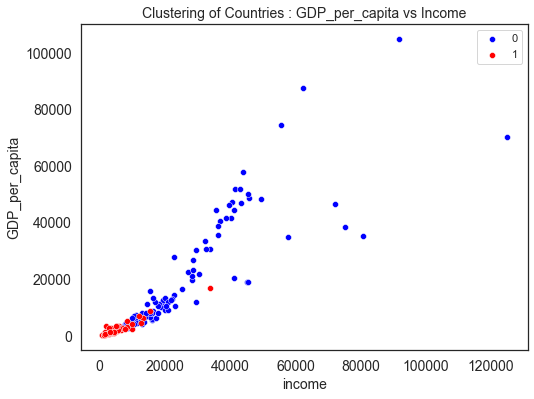

In [35]:
plot_cluster('KM_2',2,'income', 'GDP_per_capita', 'Clustering of Countries : GDP_per_capita vs Income',['blue','red'])

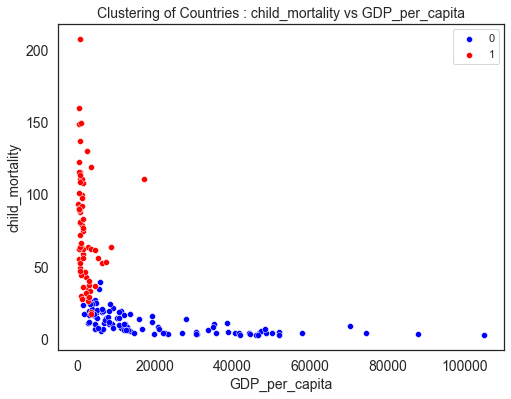

In [36]:
plot_cluster('KM_2',2,'GDP_per_capita', 'child_mortality', 'Clustering of Countries : child_mortality vs GDP_per_capita',['blue','red'])

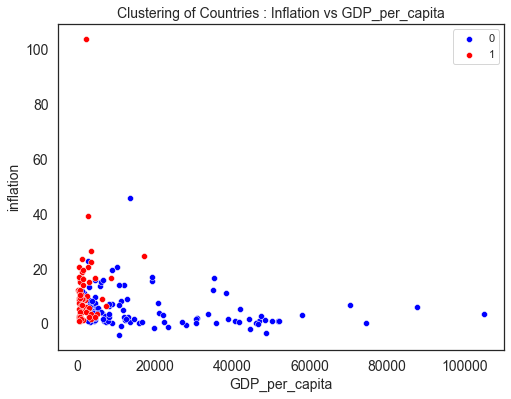

In [37]:
plot_cluster('KM_2',2,'GDP_per_capita', 'inflation','Clustering of Countries : Inflation vs GDP_per_capita',['blue','red'])

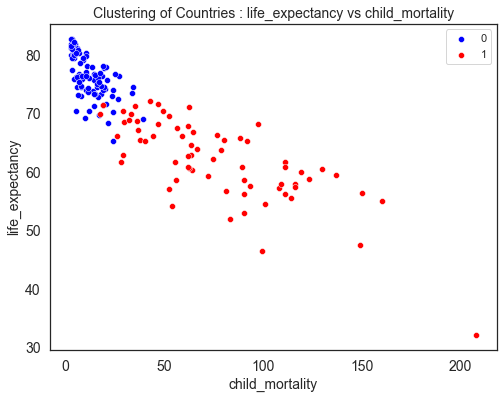

In [38]:
plot_cluster('KM_2',2,'child_mortality', 'life_expectancy','Clustering of Countries : life_expectancy vs child_mortality',['blue','red'])

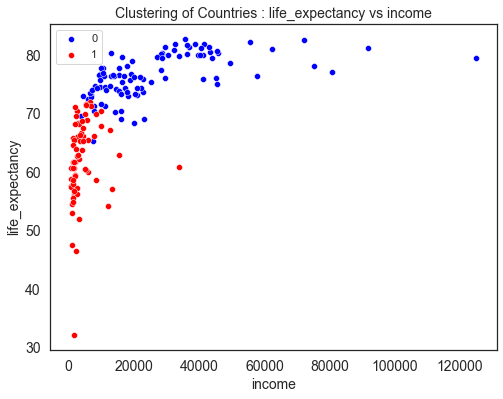

In [39]:
plot_cluster('KM_2',2,'income', 'life_expectancy','Clustering of Countries : life_expectancy vs income',['blue','red'])

> From the above plots, it can be seen that KMeans with 2 clusters does a fairly good job in grouping the countries based on their socio-economic development. The __under-developed__ and __developed__ countries seem to be fairly separated into 2 different clusters, although there is still some overlapping in certain plots.

> To overcome this, the number of clusters would be optimised to attain a more distinct clustering.

### 2. K-Means  (n_clusters = optimum based on inertia)

In [40]:
km_list = []

for num_clusters in range(1,21):
    kmc = KMeans(n_clusters = num_clusters, random_state=42)
    kmc = kmc.fit(dataxy[float_cols])
    
    km_list.append(pd.Series({'Clusters':num_clusters,
                             'inertia': kmc.inertia_,
                             'model': kmc}))

In [41]:
kmlist_df = (pd.concat(km_list, axis=1).T[['Clusters','inertia']])
kmlist_df.head(10)

,Clusters,inertia
0,1,1503.0
1,2,908.971264
2,3,735.867647
3,4,664.476521
4,5,599.087145
5,6,537.888748
6,7,502.357583
7,8,459.271475
8,9,432.433223
9,10,408.021978


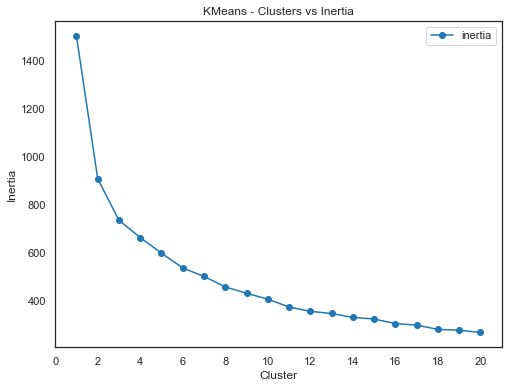

In [42]:
kmlist_df = kmlist_df.set_index('Clusters')
ax = kmlist_df.plot(marker='o', ls='-', figsize=(8,6))
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia',title='KMeans - Clusters vs Inertia');

> The number of clusters ranging from 1 to 20 have been plotted against their inertia values. Here in the plot, no distinct inflexion point is visible. But from the inertia values in the data frame kmlist_df, one could make an approximation that after n_cluster=4, the rate of decrease in the inertia values becomes gradually less.

> Hence __an optimal n_clusters = 4__ for the K-Means Algorithm can be safely chosen.

In [43]:
num_clusters = 4
km4 = KMeans(n_clusters= num_clusters, random_state=42)
tO = time()
km4 = km4.fit(dataxy[float_cols])
dataxy['KM_4'] = km4.predict(dataxy[float_cols])

runtime.append({'KM_4':round(time()-tO, 3)})
print('KMeans with n_clusters = 4 : {} sec'.format(runtime[1]['KM_4']))

KMeans with n_clusters = 4 : 0.025 sec


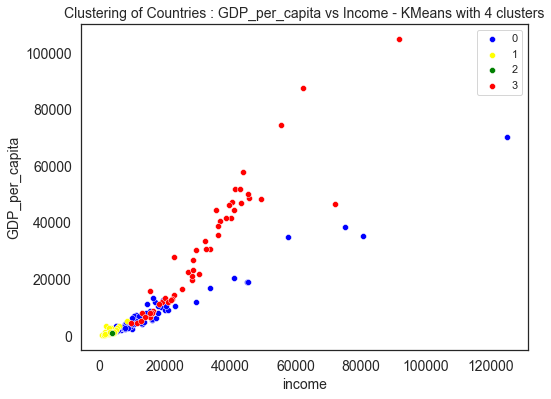

In [44]:
plot_cluster('KM_4',4,'income', 'GDP_per_capita',
             'Clustering of Countries : GDP_per_capita vs Income - KMeans with 4 clusters',['blue','yellow','green','red'])

> The KMeans with n_clusters = 4 performs apparently __a better job__ than n_clusters=2 in distinguishing between countries not only having lower income and GDP but also between countries that have higher income but lower GDP and vice-versa

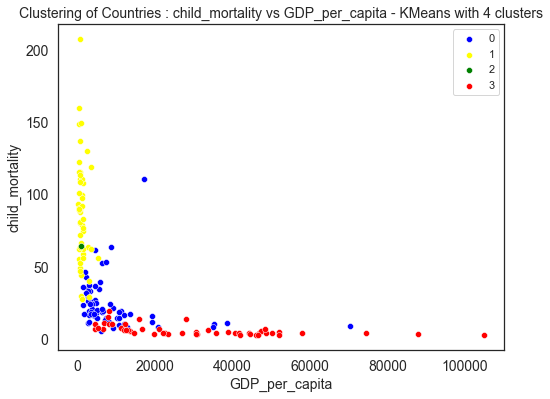

In [45]:
plot_cluster('KM_4',4,'GDP_per_capita',
             'child_mortality', 'Clustering of Countries : child_mortality vs GDP_per_capita - KMeans with 4 clusters',
             ['blue','yellow','green','red'])

> - The separation of under-developed nations (here yellow) and the developed nations (red) is a lot more clearer than 2 clusters. 
> - __The class of concern would be class 1(yellow) and out of these, the 5 most under-developed countries need to be selected for the HELP Grant__
> - Although there is some overlap in nations near the bottom left part where child_mortality and GDP both are low. But since we want to concentrate more on countries having higher mortality, this won't be a problem here.

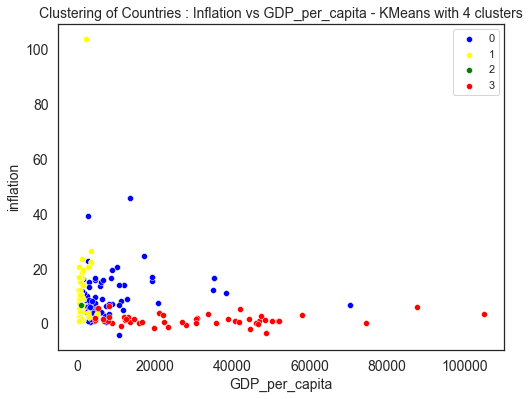

In [46]:
plot_cluster('KM_4',4,'GDP_per_capita',
             'inflation','Clustering of Countries : Inflation vs GDP_per_capita - KMeans with 4 clusters',
             ['blue','yellow','green','red'])

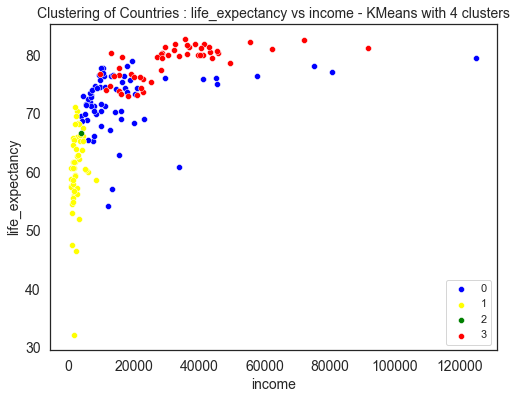

In [47]:
plot_cluster('KM_4',4,'income', 'life_expectancy','Clustering of Countries : life_expectancy vs income - KMeans with 4 clusters',
             ['blue','yellow','green','red'])

> *__Hence, from all the above plots, it is clear the KMeans does better in clustering with 4 clusters than 2 clusters__*

> Based on this fact, for the Agglo-Heirarchical method, __n_clusters = 4__ would be chosen as a base

### 3. Agglomerative Heirarchical (linkage = Single, n_clusters = 4):

In [48]:
ag_s = AgglomerativeClustering(n_clusters = 4, linkage= 'single', compute_full_tree= True)
tO = time()
ag_s = ag_s.fit(dataxy[float_cols])
dataxy['Agg_single'] = ag_s.fit_predict(dataxy[float_cols])

runtime.append({'Agg_single':round(time()-tO, 3)})
print('AgglomerativeClustering with linkage = "single" : {} sec'.format(runtime[2]['Agg_single']))

AgglomerativeClustering with linkage = "single" : 0.008 sec


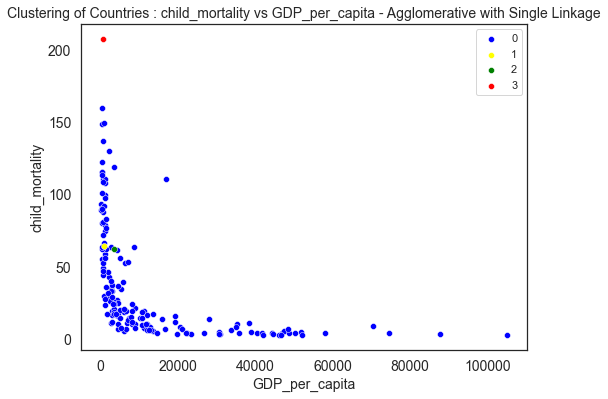

In [49]:
plot_cluster('Agg_single',4,'GDP_per_capita', 'child_mortality', 
             'Clustering of Countries : child_mortality vs GDP_per_capita - Agglomerative with Single Linkage',
             ['blue','yellow','green','red'])

> Here one can see that the Agglomerative „single“ linkage clustering with n_clusters=4, __performs poorly__ than even K-Means with 2 clusters. This may be due to the limitations of single linkage with complex clusters shapes, noise and outliers
in the data (which are present in our features like GDP). 

> __Hence this model would be rejected__

### 4. Agglomerative Heirarchical (linkage = Ward, n_clusters = 4):

In [50]:
ag_w = AgglomerativeClustering(n_clusters = 4, linkage= 'ward', compute_full_tree= True)
tO = time()
ag_w = ag_w.fit(dataxy[float_cols])
dataxy['Agg_ward'] = ag_w.fit_predict(dataxy[float_cols])

runtime.append({'Agg_ward':round(time()-tO, 3)})
print('AgglomerativeClustering with linkage = "ward" : {} sec'.format(runtime[3]['Agg_ward']))

AgglomerativeClustering with linkage = "ward" : 0.008 sec


#### Comparison of Agglo_ward model with KMeans with 4 clusters for 'child_mortality vs GDP' factor

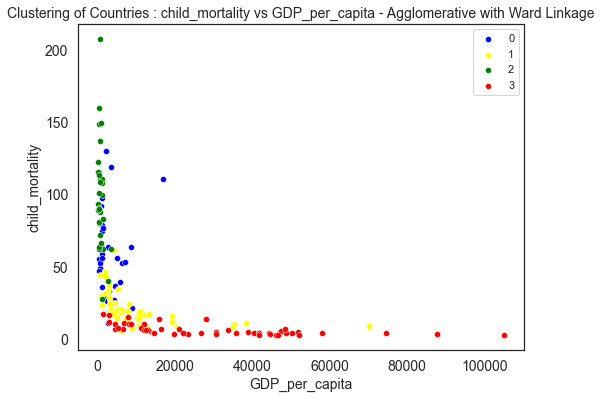

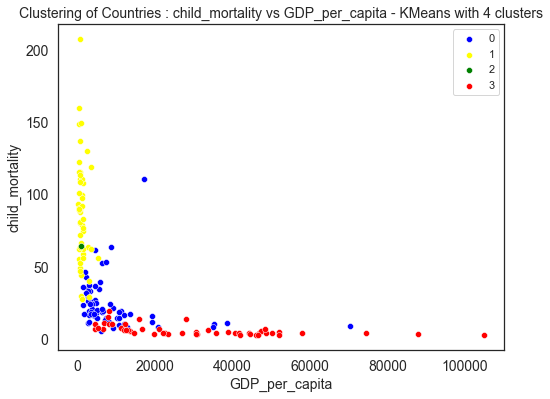

In [51]:
plot_cluster('Agg_ward',4,'GDP_per_capita', 'child_mortality', 
             'Clustering of Countries : child_mortality vs GDP_per_capita - Agglomerative with Ward Linkage',['blue','yellow','green','red'])
plot_cluster('KM_4',4,'GDP_per_capita', 'child_mortality', 
             'Clustering of Countries : child_mortality vs GDP_per_capita - KMeans with 4 clusters',['blue','yellow','green','red'])

> __For the critical factor of child mortality vs GDP, the latest Model Agglomerative with 'ward' linkage is able to more finely separate among the high mortality nations, those having higher GDP and those having very low GDP. This can be critical in correctly identifying the real under-developed nations with extremely low GDP.__

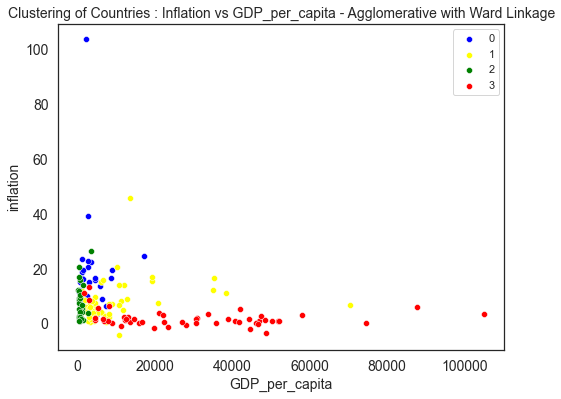

In [52]:
plot_cluster('Agg_ward',4,'GDP_per_capita', 
             'inflation','Clustering of Countries : Inflation vs GDP_per_capita - Agglomerative with Ward Linkage',
             ['blue','yellow','green','red'])

> This plot also shows a clearer marking of the countries having very high inflation separately than those with low inflation but also low GDP. Better than KMeans with 4 clusters

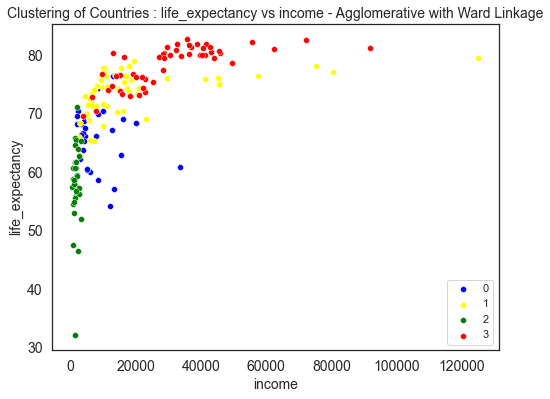

In [53]:
plot_cluster('Agg_ward',4,'income',
             'life_expectancy','Clustering of Countries : life_expectancy vs income - Agglomerative with Ward Linkage',
             ['blue','yellow','green','red'])

> Here also, the plot shows that with Ward linkage, there is a better distinction between nations, first based on a lower than 70 and higher than 70 life expectancy group and then based on income within those groups, as compared to KMeans. All 4 clusters are clearly represented

#### Comparison of Runtimes of the Models:

In [54]:
runtime

[{'KM_2': 0.025}, {'KM_4': 0.025}, {'Agg_single': 0.008}, {'Agg_ward': 0.008}]

### Best Model:

Based on the data provided, according to my opinion, the most critical factor for the socio-economic status of a country would be the __'child_mortality vs GDP_per_capita'__ factor, because it shows how good is the health infrastructure of a nation to prevent child deaths and how well is the economy basically faring based on the net GDP. 

Seeing the observations previously, Agglomerative with 'ward' linkage and KMeans with 4 clusters do a pretty good job in clustering the countries based on these factors. But as seen above, clearly Model 4, Agglomerative with 'ward' linkage is slightly better in terms of finer clustering.    

Hence, my model of choice would be Model 4, __Agglomerative Heirarchical with 'ward' linkage(4 clusters)__

In [55]:
ag_w.get_params

<bound method BaseEstimator.get_params of AgglomerativeClustering(compute_full_tree=True, n_clusters=4)>

In [56]:
dataxy.head()

,child_mortality,exports(%),health_spending,imports(%),income,inflation,life_expectancy,total_fertility,GDP_per_capita,KM_2,KM_4,Agg_single,Agg_ward
0,1.278012,-1.764313,0.279088,0.147868,-1.413035,0.629046,-1.619092,1.734817,-1.460301,1,1,0,2
1,-0.239708,-0.283872,-0.097016,0.291835,0.071660,-0.099976,0.647866,-0.944336,-0.122835,0,0,0,1
2,0.198464,0.184161,-0.966073,-0.498946,0.285240,1.188739,0.670423,0.143564,-0.064916,0,0,0,0
3,1.531191,0.908223,-1.448071,0.065136,-0.353257,1.544516,-1.179234,1.872702,-0.221309,1,1,0,0
4,-0.648481,0.437193,-0.286894,0.642228,0.605586,-1.019800,0.704258,-0.472520,0.608135,0,3,0,3


### Top 5 Countries in dire need of monetary aid from HELP International:

A criteria to solve this could be that the data can be sorted based on the highest child_mortality rate and the top 5 countries belonging to __class 2__ could be suggested to HELP organisation for the aid, as these nations would be also be having very low GDPs

In [57]:
data['Agg_ward'] = dataxy['Agg_ward']

In [58]:
data.sort_values(by = 'child_mortality', ascending = False).head(10)

,country,child_mortality,exports(%),health_spending,imports(%),income,inflation,life_expectancy,total_fertility,GDP_per_capita,Agg_ward
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,2
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,2
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,2
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,2
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,2
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.00,60.5,5.84,2330,0
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.81,57.9,5.87,575,2
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,2


From the above, it can be clearly seen how well Model 4 distinguishes between nations having low GDP and high mortality(class 2) and those having higher GDP and high mortality (class 0).    

Hence the top 5 countries would be : __Haiti, Sierra Leone, Chad, Central African Republic and Mali__